### Libraries

In [1]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras import Input, Model, regularizers
import visualkeras
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D, Reshape
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
import seaborn as sns

### Dataset loading

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data() 

### Train/test basic info

In [4]:
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
Y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
class_names = ["T-shirt", "Trousers", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneakers", "Bag", "Ankle boot"]

### Data visualization

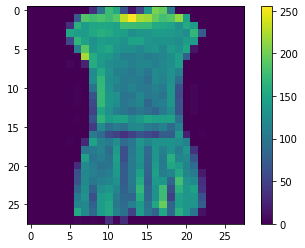

In [7]:
plt.figure()
plt.imshow(X_train[3])
plt.colorbar()
plt.grid(False)
plt.show()

### Data preprocessing

In [8]:
#Normalization
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
#Categorization
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

### Creating model

In [10]:
input = Input(shape=X_train[0].shape)
X = Flatten()(input)
X = Dense(64, activation='relu')(X)
X = Dropout(0.2)(X)
X = Dense(128, activation='relu')(X)
X = Dropout(0.2)(X)
X = Dense(256, activation='relu')(X)
X = Dropout(0.2)(X)
output = Dense(len(class_names), activation='softmax')(X)

model = Model(input, output)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               33024 

In [18]:
input2 = Input(shape=X_train[0].shape)
X = Reshape((28, 28, 1))(input2)

X = Conv2D(64, kernel_size=(3,3), padding = 'same')(X)
X = Conv2D(64, kernel_size=(3,3), padding = 'same')(X)
X = MaxPool2D(2, strides = 2, padding = 'same')(X)

X = Conv2D(128, kernel_size=(3,3), padding = 'same')(X)
X = Conv2D(128, kernel_size=(3,3), padding = 'same')(X)
X = MaxPool2D(3, strides = 2, padding = 'same')(X)

X = Conv2D(256, kernel_size=(3,3), padding = 'same')(X)
X = Conv2D(256, kernel_size=(3,3), padding = 'same')(X)
X = MaxPool2D(3, strides = 2, padding = 'same')(X)

X = Flatten()(X)
X = Dense(512, activation="relu")(X)
X = Dropout(0.2)(X) 
X = Dense(512, activation="relu")(X)
output = Dense(len(class_names), activation="softmax")(X)

model_cnn = Model(input2, output)

In [13]:
model_cnn.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       73856     
                                                           

### Model configuration

In [14]:
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model_cnn.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Model fitting

In [16]:
history = model.fit(X_train, Y_train, epochs=20, validation_split=0.2, batch_size=128)

Epoch 1/20
375/375 [==============================] - 5s 6ms/step - loss: 0.7160 - accuracy: 0.7382 - val_loss: 0.4374 - val_accuracy: 0.8403
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.4694 - accuracy: 0.8312 - val_loss: 0.3960 - val_accuracy: 0.8544
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.4202 - accuracy: 0.8459 - val_loss: 0.3983 - val_accuracy: 0.8573
Epoch 4/20
375/375 [==============================] - 3s 7ms/step - loss: 0.3978 - accuracy: 0.8566 - val_loss: 0.3581 - val_accuracy: 0.8698
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3801 - accuracy: 0.8620 - val_loss: 0.3504 - val_accuracy: 0.8712
Epoch 6/20
375/375 [==============================] - 3s 9ms/step - loss: 0.3680 - accuracy: 0.8661 - val_loss: 0.3472 - val_accuracy: 0.8734
Epoch 7/20
375/375 [==============================] - 4s 10ms/step - loss: 0.3571 - accuracy: 0.8699 - val_loss: 0.3474 - val_accuracy: 0.8757
Epoch

In [20]:
history_cnn = model_cnn.fit(X_train, Y_train, epochs=20, validation_split=0.2, batch_size=128)

Epoch 1/20
375/375 [==============================] - 14s 27ms/step - loss: 0.5296 - accuracy: 0.8053 - val_loss: 0.3410 - val_accuracy: 0.8759
Epoch 2/20
375/375 [==============================] - 9s 24ms/step - loss: 0.3142 - accuracy: 0.8857 - val_loss: 0.3046 - val_accuracy: 0.8866
Epoch 3/20
375/375 [==============================] - 10s 26ms/step - loss: 0.2639 - accuracy: 0.9032 - val_loss: 0.2861 - val_accuracy: 0.8973
Epoch 4/20
375/375 [==============================] - 9s 25ms/step - loss: 0.2395 - accuracy: 0.9121 - val_loss: 0.2839 - val_accuracy: 0.8963
Epoch 5/20
375/375 [==============================] - 9s 24ms/step - loss: 0.2185 - accuracy: 0.9196 - val_loss: 0.3052 - val_accuracy: 0.8939
Epoch 6/20
375/375 [==============================] - 9s 24ms/step - loss: 0.2004 - accuracy: 0.9275 - val_loss: 0.2592 - val_accuracy: 0.9028
Epoch 7/20
375/375 [==============================] - 10s 25ms/step - loss: 0.1881 - accuracy: 0.9305 - val_loss: 0.2693 - val_accuracy: 0.9

### Evaluation

In [21]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print("\nTest Accuracy: ", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3348 - accuracy: 0.8847

Test Accuracy:  0.8847000002861023


In [22]:
test_loss, test_acc = model_cnn.evaluate(X_test, Y_test)
print("\nTest Accuracy: ", test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.3686 - accuracy: 0.9139

Test Accuracy:  0.9139000177383423


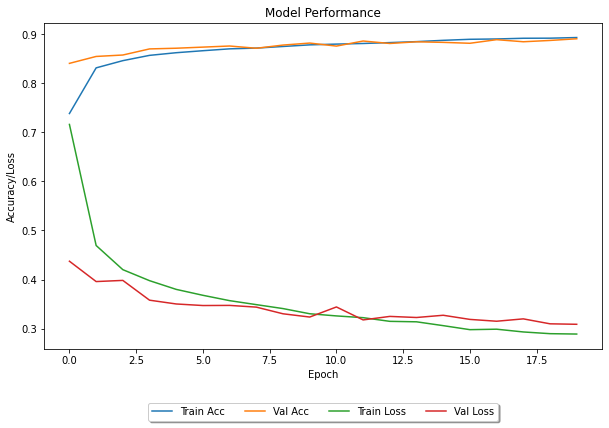

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_title('Model Performance')
ax.set_ylabel('Accuracy/Loss')
ax.set_xlabel('Epoch')
ax.legend(['Train Acc', 'Val Acc', 'Train Loss', 'Val Loss'], 
          loc='upper center', bbox_to_anchor=(0.5, -0.15), 
          fancybox=True, shadow=True, ncol=4)

plt.show()


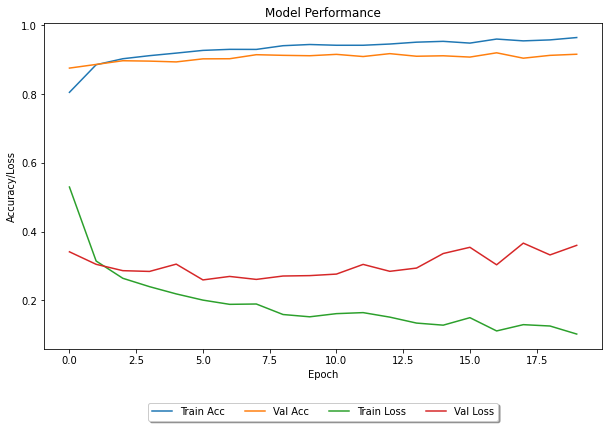

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(history_cnn.history['accuracy'])
ax.plot(history_cnn.history['val_accuracy'])
ax.plot(history_cnn.history['loss'])
ax.plot(history_cnn.history['val_loss'])
ax.set_title('Model Performance')
ax.set_ylabel('Accuracy/Loss')
ax.set_xlabel('Epoch')
ax.legend(['Train Acc', 'Val Acc', 'Train Loss', 'Val Loss'], 
          loc='upper center', bbox_to_anchor=(0.5, -0.15), 
          fancybox=True, shadow=True, ncol=4)

plt.show()

313/313 [==============================] - 1s 2ms/step
Accuracy: 0.8847
Precision: 0.8845741155802049
Recall: 0.8846999999999999
F1 Score: 0.8839534148115519


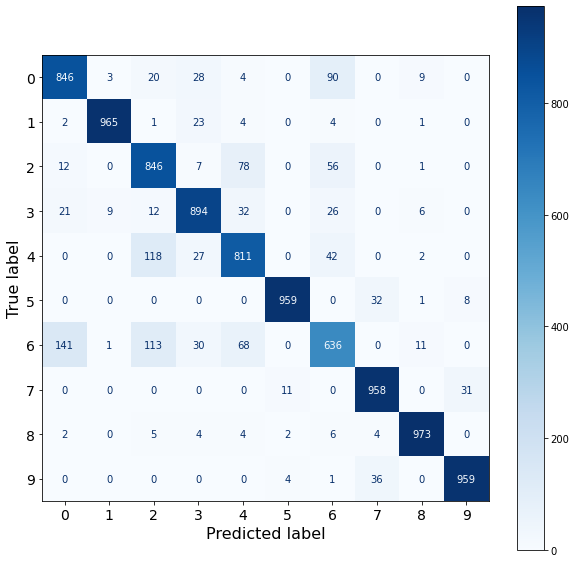

In [25]:
Y_pred = model.predict(X_test, verbose=1)
Y_pred = np.argmax(Y_pred, axis=1)
Y_test_cal = np.argmax(Y_test, axis=1)

accuracy = accuracy_score(Y_test_cal, Y_pred)
precision = precision_score(Y_test_cal, Y_pred, average='macro')
recall = recall_score(Y_test_cal, Y_pred, average='macro')
f1 = f1_score(Y_test_cal, Y_pred, average='macro')
cm = confusion_matrix(Y_test_cal, Y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10, 10))
cm_display.plot(ax=ax, cmap=plt.cm.Blues)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Predicted label', fontsize=16)
plt.ylabel('True label', fontsize=16)
plt.show()

313/313 [==============================] - 1s 3ms/step
Accuracy: 0.9139
Precision: 0.9134201037254052
Recall: 0.9138999999999999
F1 Score: 0.9133389532730563


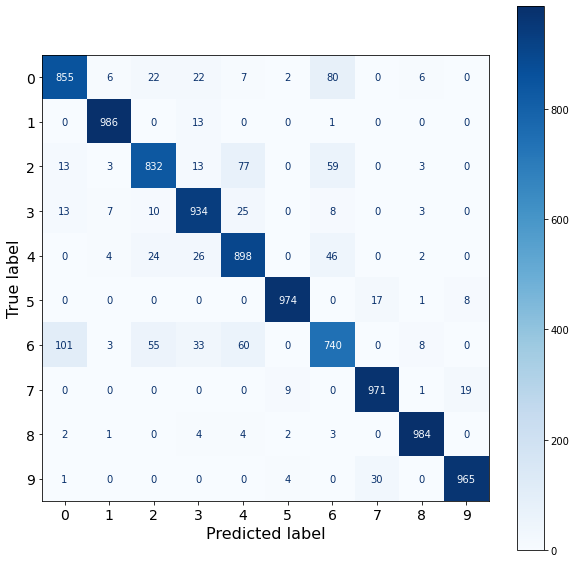

In [26]:
Y_pred = model_cnn.predict(X_test, verbose=1)
Y_pred = np.argmax(Y_pred, axis=1)
Y_test_cal = np.argmax(Y_test, axis=1)

accuracy = accuracy_score(Y_test_cal, Y_pred)
precision = precision_score(Y_test_cal, Y_pred, average='macro')
recall = recall_score(Y_test_cal, Y_pred, average='macro')
f1 = f1_score(Y_test_cal, Y_pred, average='macro')
cm = confusion_matrix(Y_test_cal, Y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10, 10))
cm_display.plot(ax=ax, cmap=plt.cm.Blues)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Predicted label', fontsize=16)
plt.ylabel('True label', fontsize=16)
plt.show()

### Detailed Prediction Analysis

In [27]:
prediction = model_cnn.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [28]:
prediction[0]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 4.2320785e-27, 0.0000000e+00, 6.1963574e-18,
       0.0000000e+00, 1.0000000e+00], dtype=float32)

In [29]:
np.argmax(prediction[0])

9

In [30]:
Y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)